<a href="https://colab.research.google.com/github/sachinbabuantony/pyflightdata/blob/master/pyflightdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set Up

In [24]:
pip install pyflightdata

In [25]:
from pyflightdata import FlightData

from google.colab import userdata
pwd = userdata.get('flightradar24')

f=FlightData()
f.login('sachinbabuantony@gmail.com',pwd)

In [26]:
f.is_authenticated()

True

#Airlines List with Call Sign and Fleet-size

In [27]:
import pandas as pd
from pyflightdata import FlightData

f = FlightData()
airlines_list = f.get_airlines()

df = pd.DataFrame(airlines_list)
df_sorted = df.sort_values('fleet-size', ascending=False) # Replace 'name' with the column you want to sort by
df_sorted.head()

,title,airline-code,img,callsign,fleet-size
1426,Spain - Air Force,ame,https://www.flightradar24.com/static/images/da...,AME,99 aircraft
747,Germany - Air Force,gaf,https://www.flightradar24.com/static/images/da...,GAF,99 aircraft
929,Juneyao Air,ho-dkh,https://images.flightradar24.com/assets/airlin...,HO / DKH,98 aircraft
609,Etihad Airways,ey-etd,https://images.flightradar24.com/assets/airlin...,EY / ETD,96 aircraft
1634,Vietnam Airlines,vn-hvn,https://images.flightradar24.com/assets/airlin...,VN / HVN,95 aircraft


#Fleet Data

In [28]:
fleet = f.get_fleet('ey-etd')
fleet_df = pd.DataFrame(fleet)
fleet_df

,reg,type,msn,age
0,A6-AEN,Airbus A321-251N,requires user login,requires user login
1,A6-AEO,Airbus A321-251N,requires user login,requires user login
2,A6-AEP,Airbus A321-251N,requires user login,requires user login
3,A6-AEQ,Airbus A321-251N,requires user login,requires user login
4,A6-AER,Airbus A321-251NX,requires user login,requires user login
...,...,...,...,...
91,A6-BMF,Boeing 787-10 Dreamliner,requires user login,requires user login
92,A6-BMG,Boeing 787-10 Dreamliner,requires user login,requires user login
93,A6-BMH,Boeing 787-10 Dreamliner,requires user login,requires user login
94,A6-BMI,Boeing 787-10 Dreamliner,requires user login,requires user login


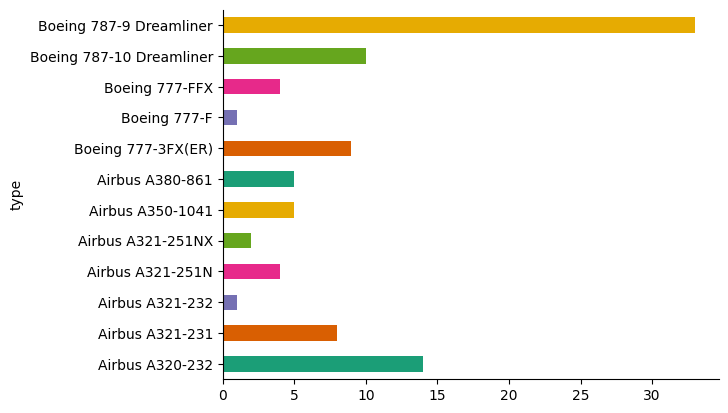

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
fleet_df.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#Aircraft realtime status including future schedules and history

In [30]:
tail_number = 'A6-AEN'
tail_number_data = f.get_history_by_tail_number(tail_number,page=1,limit=10)

In [31]:
# Extracting data into a list of dictionaries
flights_tailNum = []
for entry in tail_number_data: # Iterate over the flight data
    # Handle potential missing 'departure_date' and 'departure_time'
    scheduled_departure_date = entry['time']['scheduled'].get('departure_date', '')
    scheduled_departure_time = entry['time']['scheduled'].get('departure_time', '')

    # Similarly, handle potential missing 'arrival_date' and 'arrival_time'
    scheduled_arrival_date = entry['time']['scheduled'].get('arrival_date', '')
    scheduled_arrival_time = entry['time']['scheduled'].get('arrival_time', '')

    flights_tailNum.append({
        'Flight Number': entry['identification']['number']['default'],
        'Callsign': entry['identification']['callsign'],
        'Aircraft Registration': entry['aircraft']['registration'],
        'carriercode': entry['airline']['code'],
        'Airline': entry['airline']['name'],
        'Aircraft Model Text': entry['aircraft']['model']['text'],
        'Origin Airport': entry['airport']['origin']['name'],
        'Destination Airport': entry['airport']['destination']['name'],
        'Airport Code origin': entry['airport']['origin']['code'],
        'Airport code destiation': entry['airport']['destination']['code'],
        'Scheduled Departure Time': scheduled_departure_date + ' ' + scheduled_departure_time,
        'Scheduled Arrival Time': scheduled_arrival_date + ' ' + scheduled_arrival_time,
        'Real Departure Time': entry['time']['real'].get('departure', ''),  # Handle potential missing 'departure'
        'Real Arrival Time': entry['time']['real'].get('arrival', ''),    # Handle potential missing 'arrival'
        'Status': entry['status']['text']
    })

# Creating DataFrame
df2 = pd.DataFrame(flights_tailNum)

# Print or analyze the DataFrame
df2

,Flight Number,Callsign,Aircraft Registration,carriercode,Airline,Aircraft Model Text,Origin Airport,Destination Airport,Airport Code origin,Airport code destiation,Scheduled Departure Time,Scheduled Arrival Time,Real Departure Time,Real Arrival Time,Status
0,EY513,None,A6-AEN,"{'iata': 'EY', 'icao': 'ETD'}",Etihad Airways,Airbus A321-251N,Abu Dhabi Zayed International Airport,Amman Queen Alia International Airport,"{'iata': 'AUH', 'icao': 'OMAA'}","{'iata': 'AMM', 'icao': 'OJAI'}",20240831 0635,20240831 0950,None,None,Estimated dep 10:56
1,EY217,None,A6-AEN,"{'iata': 'EY', 'icao': 'ETD'}",Etihad Airways,Airbus A321-251N,Bengaluru Kempegowda International Airport,Abu Dhabi Zayed International Airport,"{'iata': 'BLR', 'icao': 'VOBL'}","{'iata': 'AUH', 'icao': 'OMAA'}",20240830 2255,20240831 0300,None,None,Estimated dep 04:38
2,EY216,None,A6-AEN,"{'iata': 'EY', 'icao': 'ETD'}",Etihad Airways,Airbus A321-251N,Abu Dhabi Zayed International Airport,Bengaluru Kempegowda International Airport,"{'iata': 'AUH', 'icao': 'OMAA'}","{'iata': 'BLR', 'icao': 'VOBL'}",20240830 1720,20240830 2135,None,None,Estimated dep 21:41
3,EY514,None,A6-AEN,"{'iata': 'EY', 'icao': 'ETD'}",Etihad Airways,Airbus A321-251N,Amman Queen Alia International Airport,Abu Dhabi Zayed International Airport,"{'iata': 'AMM', 'icao': 'OJAI'}","{'iata': 'AUH', 'icao': 'OMAA'}",20240830 1135,20240830 1435,None,None,Estimated dep 14:49
4,EY513,None,A6-AEN,"{'iata': 'EY', 'icao': 'ETD'}",Etihad Airways,Airbus A321-251N,Abu Dhabi Zayed International Airport,Amman Queen Alia International Airport,"{'iata': 'AUH', 'icao': 'OMAA'}","{'iata': 'AMM', 'icao': 'OJAI'}",20240830 0635,20240830 0950,None,None,Estimated dep 10:35
5,EY217,None,A6-AEN,"{'iata': 'EY', 'icao': 'ETD'}",Etihad Airways,Airbus A321-251N,Bengaluru Kempegowda International Airport,Abu Dhabi Zayed International Airport,"{'iata': 'BLR', 'icao': 'VOBL'}","{'iata': 'AUH', 'icao': 'OMAA'}",20240829 2255,20240830 0300,None,None,Estimated dep 04:38
6,EY216,None,A6-AEN,"{'iata': 'EY', 'icao': 'ETD'}",Etihad Airways,Airbus A321-251N,Abu Dhabi Zayed International Airport,Bengaluru Kempegowda International Airport,"{'iata': 'AUH', 'icao': 'OMAA'}","{'iata': 'BLR', 'icao': 'VOBL'}",20240829 1720,20240829 2135,None,None,Estimated dep 21:20
7,EY237,ETD237,A6-AEN,"{'iata': 'EY', 'icao': 'ETD'}",Etihad Airways,Airbus A321-251N,Bengaluru Kempegowda International Airport,Abu Dhabi Zayed International Airport,"{'iata': 'BLR', 'icao': 'VOBL'}","{'iata': 'AUH', 'icao': 'OMAA'}",20240829 0430,20240829 0835,1724907609,1724919622,Landed 12:20
8,EY236,ETD236,A6-AEN,"{'iata': 'EY', 'icao': 'ETD'}",Etihad Airways,Airbus A321-251N,Abu Dhabi Zayed International Airport,Bengaluru Kempegowda International Airport,"{'iata': 'AUH', 'icao': 'OMAA'}","{'iata': 'BLR', 'icao': 'VOBL'}",20240828 2310,20240829 0320,1724888669,1724901978,Landed 08:56
9,EY239,ETD239,A6-AEN,"{'iata': 'EY', 'icao': 'ETD'}",Etihad Airways,Airbus A321-251N,Bengaluru Kempegowda International Airport,Abu Dhabi Zayed International Airport,"{'iata': 'BLR', 'icao': 'VOBL'}","{'iata': 'AUH', 'icao': 'OMAA'}",20240825 1625,20240825 2030,1724603429,1724615977,Landed 23:59


#More details from Tail Number

In [32]:
flight_info = f.get_info_by_tail_number(tail_number)

flight_info
flattened_data = {}
for key, value in flight_info.items():
    if isinstance(value, dict):
        for sub_key, sub_value in value.items():
            flattened_data[key + '_' + sub_key] = [sub_value]
    else:
        flattened_data[key] = [value]

flight_info_df = pd.DataFrame(flattened_data)
flight_info_df

,model_code,model_text,registration,country_name,country_alpha2,country_alpha3,restricted,serialNo,age_availability,availability_serialNo,availability_age,owner_name,owner_code,airline_name,airline_code,airline_short
0,A21N,Airbus A321-251N,A6-AEN,United Arab Emirates,AE,ARE,False,None,True,True,True,Etihad Airways,"{'iata': 'EY', 'icao': 'ETD'}",Etihad Airways,"{'iata': 'EY', 'icao': 'ETD'}",Etihad Airways


#Flight Images

In [33]:
from IPython.display import Image, display

images = f.get_images_by_tail_number(tail_number, page=1, limit=100)

for image in images:
  for thumbnail in image['images']['thumbnails']:
    display(Image(url=thumbnail['src']))

In [34]:
try:
    # Find the row where 'Real Departure Time' is not 'None' and 'Real Arrival Time' is 'None'
    row = df2[(df2['Real Departure Time'] != 'None') & (df2['Real Arrival Time'] == 'None')]

    if not row.empty:
        # Extract the callsign from that row
        callsign = row['Callsign'].iloc[0]

        # Create the embedded link for Flightradar24
        link_flightradar = f"https://www.flightradar24.com/{callsign}"

        # Print the link with the callsign
        print(link_flightradar)

        # Extract the Flight Number from that row
        flight_number = row['Flight Number'].iloc[0]

        # Create the embedded link for RadarBox
        link_radarbox = f"https://www.radarbox.com/flight/{flight_number}"

        # Print the link with the flight number
        print(link_radarbox)

    else:
        print("No flights found with Real Departure Time but without Real Arrival Time.")

except KeyError as e:
    print(f"Error: Missing column {str(e)}. Please check your data frame columns.")
except IndexError as e:
    print("Error: No flights match the criteria. Might be a private plane or missing data.")
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}. This could be due to private flight data or other unforeseen issues.")


No flights found with Real Departure Time but without Real Arrival Time.


In [35]:
from datetime import datetime
import pytz

try:
    # Find the latest flight that has a value for 'Real Arrival Time'
    valid_arrivals = df2[df2['Real Arrival Time'] != 'None']

    if valid_arrivals.empty:
        print("No flights found with Real Arrival Time.")
    else:
        # Sort the DataFrame by 'Real Arrival Time' in descending order and select the latest row
        latest_arrival_row = valid_arrivals.sort_values('Real Arrival Time', ascending=False).iloc[0]

        # Extract the Real Arrival Time
        arrival_time_str = latest_arrival_row['Real Arrival Time']

        # Convert to datetime object
        if isinstance(arrival_time_str, int):  # Check if the value is an integer Unix timestamp
            arrival_time = datetime.utcfromtimestamp(arrival_time_str).replace(tzinfo=pytz.utc)
        elif isinstance(arrival_time_str, str):  # Check if it's a string and format it accordingly
            arrival_time = datetime.strptime(arrival_time_str, '%Y-%m-%dT%H:%M:%S.%fZ').replace(tzinfo=pytz.utc)
        else:
            raise ValueError("Unexpected format for 'Real Arrival Time'.")

        # Get the current time in UTC
        now = datetime.now(pytz.utc)

        # Calculate the time difference
        time_difference = now - arrival_time

        # Print the time difference
        print(f"Time since last arrival: {time_difference}")

except KeyError as e:
    print(f"Error: Missing column {str(e)}. Please check your data frame columns.")
except ValueError as e:
    print(f"Error: {str(e)}. Please ensure 'Real Arrival Time' is in the correct format or type.")
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}. This might be due to unforeseen issues in the data.")


Time since last arrival: 2:27:26.807507
